In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

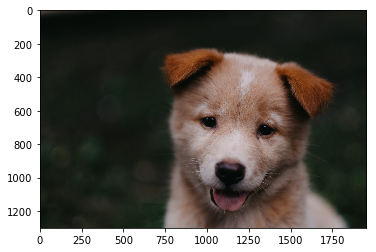

In [11]:
img = cv2.imread('../DATA/00-puppy.jpg')
fixed_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(fixed_img)

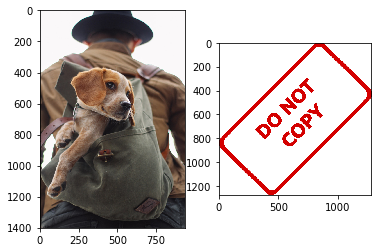

In [12]:
# Image blending: use addWeighted function
# new_pixel = alpha * pixel_1 + beta * pixel_2 + gamma
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(img1)
axes[1].imshow(img2)

In [13]:
img1.shape, img2.shape

((1401, 934, 3), (1280, 1277, 3))

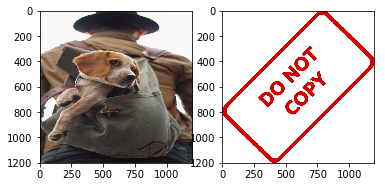

In [14]:
img1 = cv2.resize(img1, (1200, 1200))
img2 = cv2.resize(img2, (1200, 1200))
fig, axes = plt.subplots(1, 2)
axes[0].imshow(img1)
axes[1].imshow(img2)

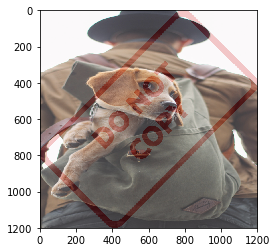

In [16]:
blended_img = cv2.addWeighted(src1=img1, alpha=0.8,
                             src2=img2, beta=0.2, gamma=0)
plt.imshow(blended_img)

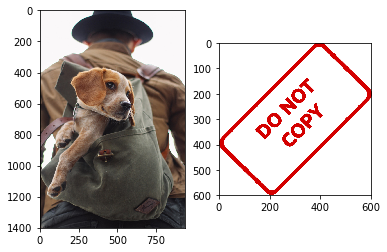

In [19]:
# Overlay small image on top of a larger image without blending
# Numpy reassignment
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img2 = cv2.resize(img2, (600, 600))

fig, axes = plt.subplots(1, 2)
axes[0].imshow(img1)
axes[1].imshow(img2)

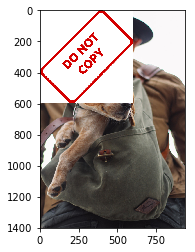

In [20]:
large_img = img1
small_img = img2

x_offset = 0
y_offset = 0

x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

large_img[y_offset:y_end, x_offset:x_end] = small_img

plt.imshow(large_img)

In [21]:
# Blend together images with different sizes
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img2 = cv2.resize(img2, (600, 600))

In [22]:
img1.shape

(1401, 934, 3)

In [23]:
x_offset = 934 - 600
y_offset = 1401 - 600

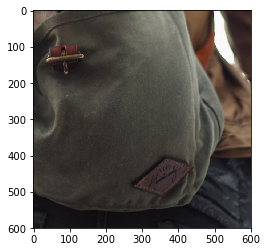

In [24]:
rows, cols, channels = img2.shape
roi = img1[y_offset:1401, x_offset:934, :]
plt.imshow(roi)

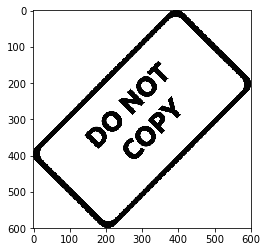

In [26]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray, cmap='gray')

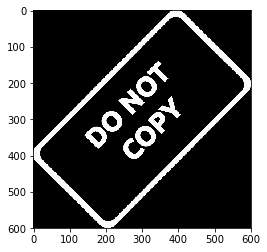

In [28]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv, cmap='gray')

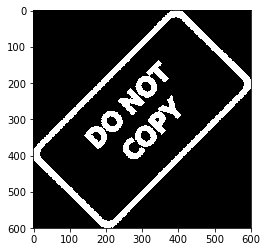

In [34]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)
plt.imshow(bk)

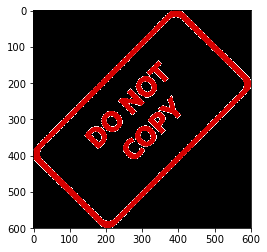

In [36]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(fg)

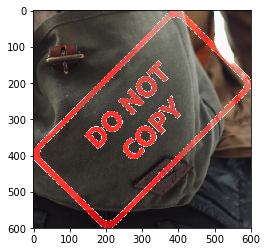

In [37]:
final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi)

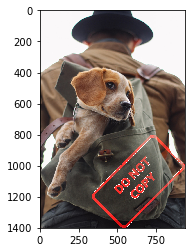

In [38]:
large_img = img1
small_img = final_roi
large_img[y_offset:y_offset + small_img.shape[0], x_offset:x_offset + small_img.shape[1]] = small_img
plt.imshow(large_img)